# Imports and Definitions

In [211]:
import sys
sys.path.append('../')

In [212]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.6)
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from utils.data_utils import preprocess_and_normalize_energy_data, parse_codecarbon_output
from sklearn.linear_model import LinearRegression
from utils.experiments_utils import split_data_set, fit_model, apply_data_transforms, test_model
%load_ext autoreload
%autoreload 2
SEED = 1234

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
param_cols = ['batch_size','input_size']

# ReLU
## Data Loading

In [214]:
d1_relu = parse_codecarbon_output(
    '../data/activations/01_relu_raw.csv',
    False,
    ('../data/activations/01_relu-slurm-log.out','relu',False,3)
)
print("dataset shape:", d1_relu.shape)
d1_relu["test"] = True
d2_relu = parse_codecarbon_output(
    '../data/activations/00_relu-raw.csv',
    False,
    ('../data/activations/00_activations-slurm-log.out','relu',True,3)
)
d2_relu["test"] = False
print("dataset shape:", d2_relu.shape)
data_unnormalized_relu = pd.concat([d1_relu,d2_relu])
print("dataset shape before aggregation: ", data_unnormalized_relu.shape)

Dropped observations with the following indices: [115, 169, 286, 368, 456, 565, 761, 791, 953, 1127, 1154, 1295, 1462]
dataset shape: (1487, 27)
Dropped observations with the following indices: [36, 37, 38, 210, 211, 212, 234, 235, 236, 378, 379, 380, 543, 544, 545, 636, 637, 638, 834, 835, 836, 1041, 1042, 1043, 1206, 1207, 1208, 1236, 1237, 1238, 1371, 1372, 1373, 1431, 1432, 1433]
dataset shape: (1464, 28)
dataset shape before aggregation:  (2951, 28)


In [215]:
data_relu = preprocess_and_normalize_energy_data(data_unnormalized_relu, param_cols, aggregate=True)
data_relu.head()

Final shape of data set: (988, 19)


,batch_size,input_size,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,gpu_count,ram_total_size,rep_no,macs,forward_passes,test
0,511,4964807,33.348036,0.001094,0.032864,49.231577,30.569333,288.75,0.000103,0.000044,0.000400,0.000547,2.0,1.0,770.0,2.0,2.537016e+09,6.666667,1.0
1,325,1325323,30.436965,0.000998,0.032780,75.151260,30.690667,288.75,0.000017,0.000007,0.000066,0.000090,2.0,1.0,770.0,2.0,4.307300e+08,36.666667,1.0
2,374,4613506,30.878238,0.001040,0.033658,48.407276,30.610000,288.75,0.000071,0.000030,0.000283,0.000384,2.0,1.0,770.0,2.0,1.725451e+09,9.000000,1.0
3,218,4327579,30.186662,0.000965,0.031969,74.965870,30.471000,288.75,0.000039,0.000016,0.000145,0.000200,2.0,1.0,770.0,2.0,9.434122e+08,16.000000,1.0
4,143,3873946,30.478427,0.001024,0.033599,73.076756,30.495000,288.75,0.000024,0.000010,0.000093,0.000126,2.0,1.0,770.0,2.0,5.539743e+08,27.000000,1.0


## Modeling
### Feature Set: Parameters

In [216]:
dfs = split_data_set(data_relu, param_cols, SEED, verbose=True)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/691, val/198 and test-set/99
Average R2 Cross-Validation Score: 0.981 (± 0.004)
Average MSE Cross-Validation: -1.040e-03 (± 2.158e-04)
Validation R2 Score: 0.979
Validation MSE: 1.031e-03


Test R2 Score: 0.9812
Test MSE: 8.991e-04


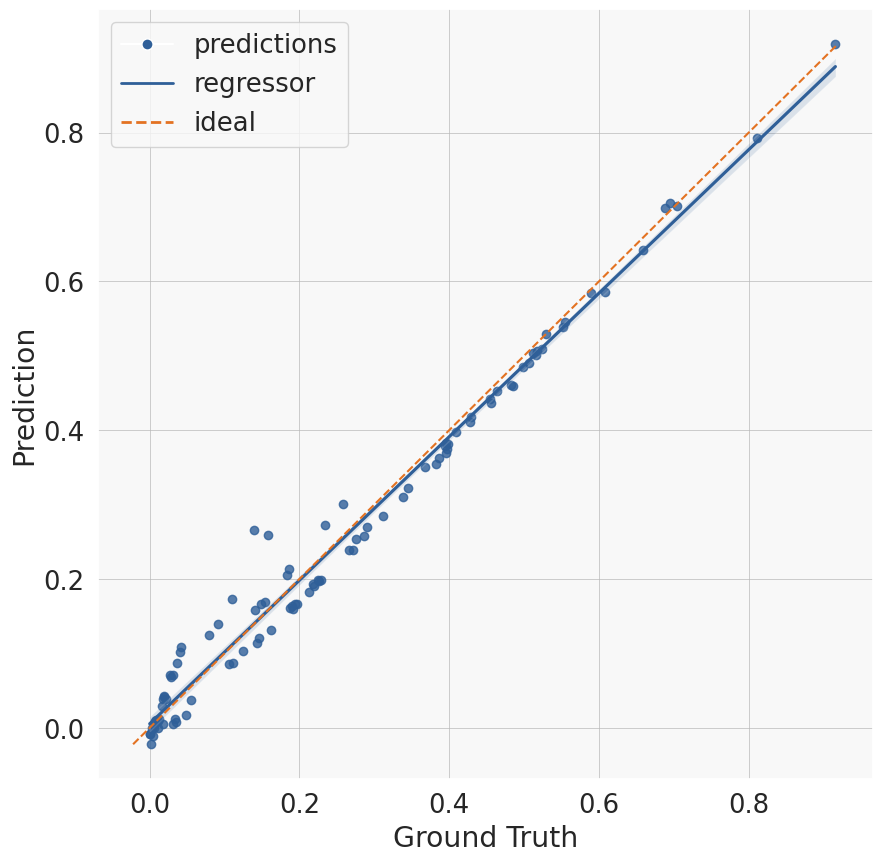

In [217]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

## Modeling
### Feature Set: MACs

In [218]:
dfs = split_data_set(data_relu, ['macs'], SEED, verbose=True)
transformers_dict = {
    "x_preprocessors": None,
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/691, val/198 and test-set/99
Average R2 Cross-Validation Score: 0.981 (± 0.005)
Average MSE Cross-Validation: -1.046e-03 (± 2.284e-04)
Validation R2 Score: 0.979
Validation MSE: 1.030e-03


Test R2 Score: 0.9812
Test MSE: 8.998e-04


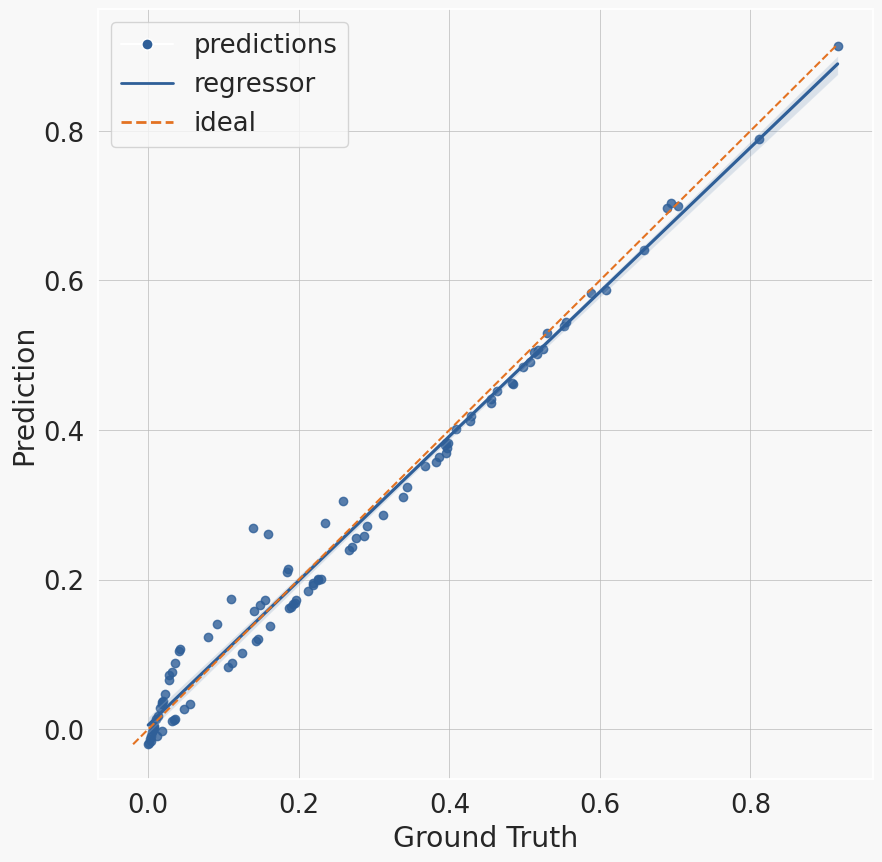

In [219]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

# TanH
## Data Loading

In [220]:
data_unnormalized_tanh = parse_codecarbon_output(
    '../data/activations/00_tanh-raw.csv',
    False,
    ('../data/activations/00_activations-slurm-log.out','tanh',True,3)
)

Dropped observations with the following indices: [138, 139, 140, 195, 196, 197, 303, 304, 305, 396, 397, 398, 462, 463, 464, 786, 787, 788, 948, 949, 950, 1107, 1108, 1109, 1272, 1273, 1274]


In [221]:
print("dataset shape before aggregation: ", data_unnormalized_tanh.shape)
data_tanh = preprocess_and_normalize_energy_data(data_unnormalized_tanh, param_cols, aggregate=True)
data_tanh.head()

dataset shape before aggregation:  (1473, 27)
Final shape of data set: (491, 18)


,batch_size,input_size,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,gpu_count,ram_total_size,rep_no,macs,forward_passes
0,353,1326998,30.550957,0.001123,0.036837,76.592422,29.856333,288.75,0.000017,6.695451e-06,0.000068,0.000092,2.0,1.0,770.0,2.0,0.0,52.333333
1,341,4892172,32.817825,0.001073,0.032708,75.291991,29.623333,288.75,0.000076,3.004319e-05,0.000290,0.000396,2.0,1.0,770.0,2.0,0.0,9.000000
2,111,4566314,30.134626,0.001112,0.036898,76.599624,29.869333,288.75,0.000019,7.329654e-06,0.000086,0.000112,2.0,1.0,770.0,2.0,0.0,46.333333
3,441,1087035,30.380539,0.001120,0.036885,75.816491,29.481333,288.75,0.000012,4.736639e-06,0.000050,0.000068,2.0,1.0,770.0,2.0,0.0,71.666667
4,156,690781,30.064531,0.001355,0.045069,77.737987,29.561333,288.75,0.000002,5.615547e-07,0.000008,0.000010,2.0,1.0,770.0,2.0,0.0,440.000000


## Modeling
### Feature Set: Parameters

In [222]:
dfs = split_data_set(data_tanh, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=False)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Average R2 Cross-Validation Score: 0.976 (± 0.008)
Average MSE Cross-Validation: -1.315e-03 (± 4.252e-04)
Validation R2 Score: 0.979
Validation MSE: 1.438e-03


Test R2 Score: 0.9761
Test MSE: 1.412e-03


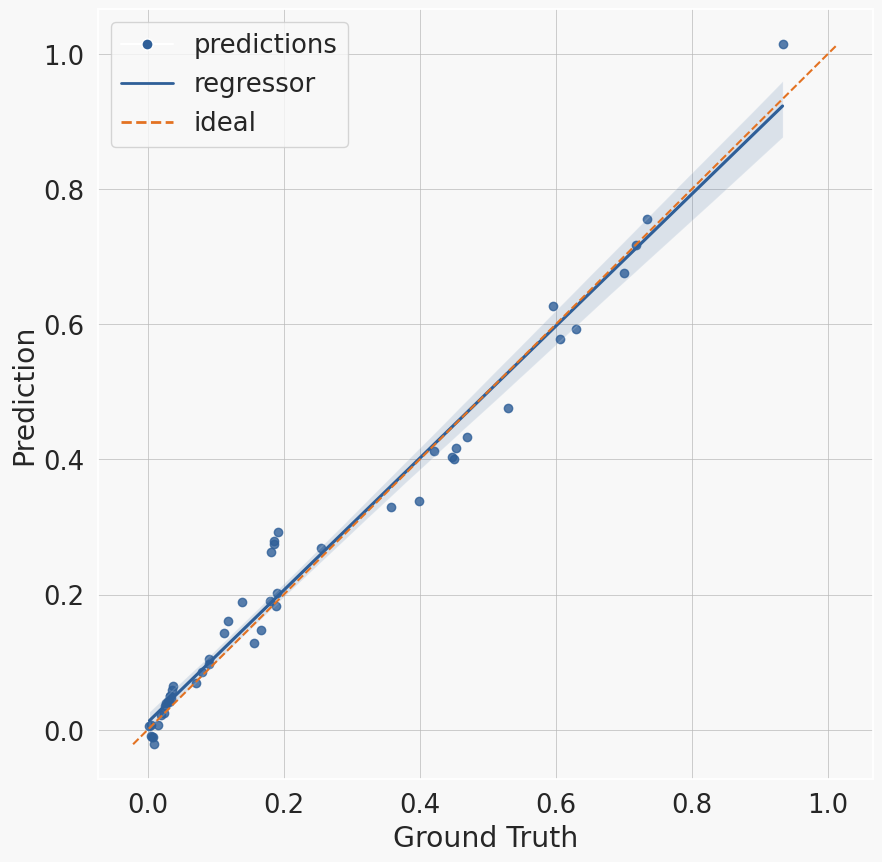

In [223]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

### Notes
- standardscaler has no effect

# Sigmoid
## Data Loading

In [224]:
data_unnormalized_sigmoid = parse_codecarbon_output(
    '../data/activations/00_sigmoid-raw.csv',
    False,
    ('../data/activations/00_activations-slurm-log.out','sigmoid',True,3)
)

Dropped observations with the following indices: [21, 22, 23, 120, 121, 122, 183, 184, 185, 345, 346, 347, 516, 517, 518, 828, 829, 830, 996, 997, 998, 1110, 1111, 1112, 1161, 1162, 1163, 1305, 1306, 1307, 1479, 1480, 1481]


In [225]:
print("dataset shape before aggregation: ", data_unnormalized_sigmoid.shape)
data_sigmoid = preprocess_and_normalize_energy_data(data_unnormalized_sigmoid, param_cols, aggregate=True)
data_sigmoid.head()

dataset shape before aggregation:  (1467, 27)
Final shape of data set: (489, 18)


,batch_size,input_size,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,gpu_count,ram_total_size,rep_no,macs,forward_passes
0,506,4505379,35.223038,0.001152,0.032715,75.323322,29.871333,288.75,0.000123,0.000048,0.000467,0.000638,2.0,1.0,770.0,2.0,0.0,6.000000
1,219,1266149,30.255887,0.001000,0.033037,78.446300,29.714000,288.75,0.000006,0.000002,0.000021,0.000028,2.0,1.0,770.0,2.0,0.0,117.333333
2,352,3366962,30.672796,0.001125,0.036669,73.302046,29.602667,288.75,0.000064,0.000025,0.000284,0.000374,2.0,1.0,770.0,2.0,0.0,10.000000
3,435,624213,30.178774,0.001238,0.041040,75.634361,29.724667,288.75,0.000005,0.000002,0.000026,0.000034,2.0,1.0,770.0,2.0,0.0,122.000000
4,494,2160900,31.276623,0.001023,0.032715,74.445486,29.840000,288.75,0.000058,0.000023,0.000219,0.000300,2.0,1.0,770.0,2.0,0.0,11.333333


## Modeling
### Feature Set: Parameters

In [226]:
dfs = split_data_set(data_sigmoid, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Average R2 Cross-Validation Score: 0.981 (± 0.008)
Average MSE Cross-Validation: -1.047e-03 (± 1.866e-04)
Validation R2 Score: 0.975
Validation MSE: 1.285e-03


Test R2 Score: 0.9905
Test MSE: 7.538e-04


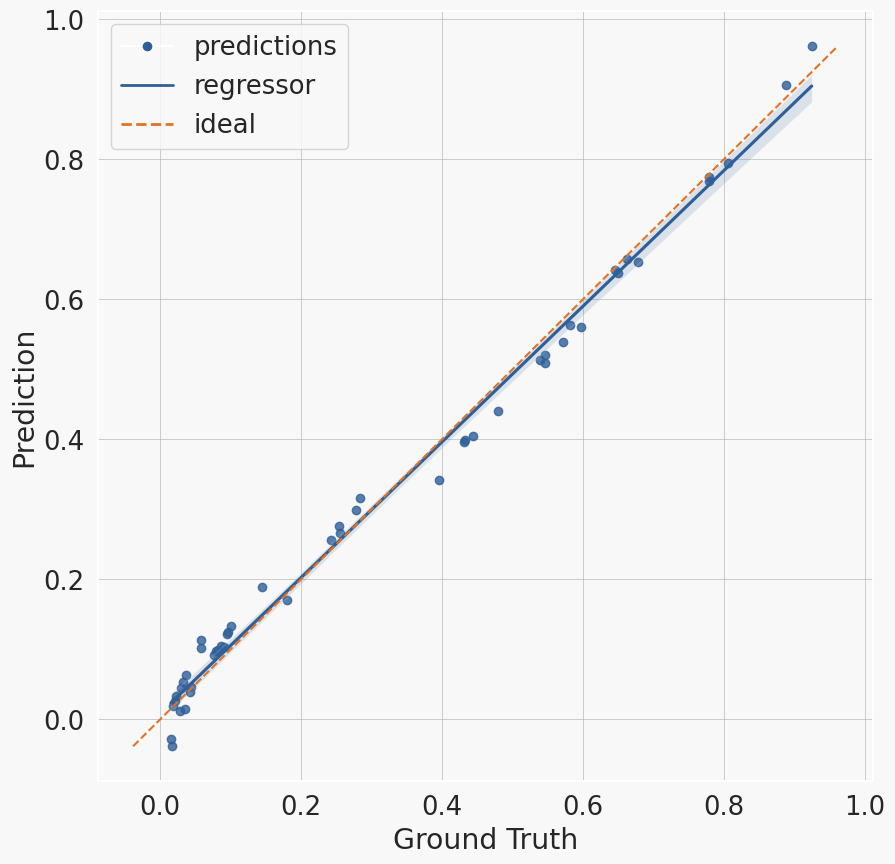

In [227]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

# Softmax
## Data Loading

In [228]:
data_unnormalized_softmax = parse_codecarbon_output(
    '../data/activations/00_softmax-raw.csv',
    False,
    ('../data/activations/00_activations-slurm-log.out','softmax',True,3)
)

Dropped observations with the following indices: [72, 73, 74, 93, 94, 95, 255, 256, 257, 273, 274, 275, 417, 418, 419, 1215, 1216, 1217, 1242, 1243, 1244]


In [229]:
print("dataset shape before aggregation: ", data_unnormalized_softmax.shape)
data_softmax = preprocess_and_normalize_energy_data(data_unnormalized_softmax, param_cols, aggregate=True)
data_softmax.head()

dataset shape before aggregation:  (1479, 27)
Final shape of data set: (493, 18)


,batch_size,input_size,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,energy_consumed,cpu_count,gpu_count,ram_total_size,rep_no,macs,forward_passes
0,415,1673479,30.401512,0.001120,0.036864,74.622881,29.727333,288.75,0.000042,0.000016,0.000174,0.000233,2.0,1.0,770.0,2.0,0.0,16.666667
1,150,528017,30.119854,0.001237,0.041087,75.758087,29.712333,288.75,0.000003,0.000001,0.000014,0.000018,2.0,1.0,770.0,2.0,0.0,230.000000
2,352,3105482,32.593072,0.001069,0.032813,76.397953,29.986667,288.75,0.000077,0.000030,0.000288,0.000395,2.0,1.0,770.0,2.0,0.0,9.000000
3,50,3883956,30.218480,0.001117,0.036972,78.031386,29.637333,288.75,0.000008,0.000003,0.000033,0.000043,2.0,1.0,770.0,2.0,0.0,85.666667
4,91,2167276,30.187220,0.001237,0.040999,77.379755,29.831333,288.75,0.000008,0.000003,0.000038,0.000048,2.0,1.0,770.0,2.0,0.0,85.000000


## Modeling
### Feature Set: Parameters

In [230]:
dfs = split_data_set(data_softmax, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Average R2 Cross-Validation Score: 0.989 (± 0.004)
Average MSE Cross-Validation: -5.671e-04 (± 1.599e-04)
Validation R2 Score: 0.993
Validation MSE: 4.760e-04


Test R2 Score: 0.9913
Test MSE: 4.972e-04


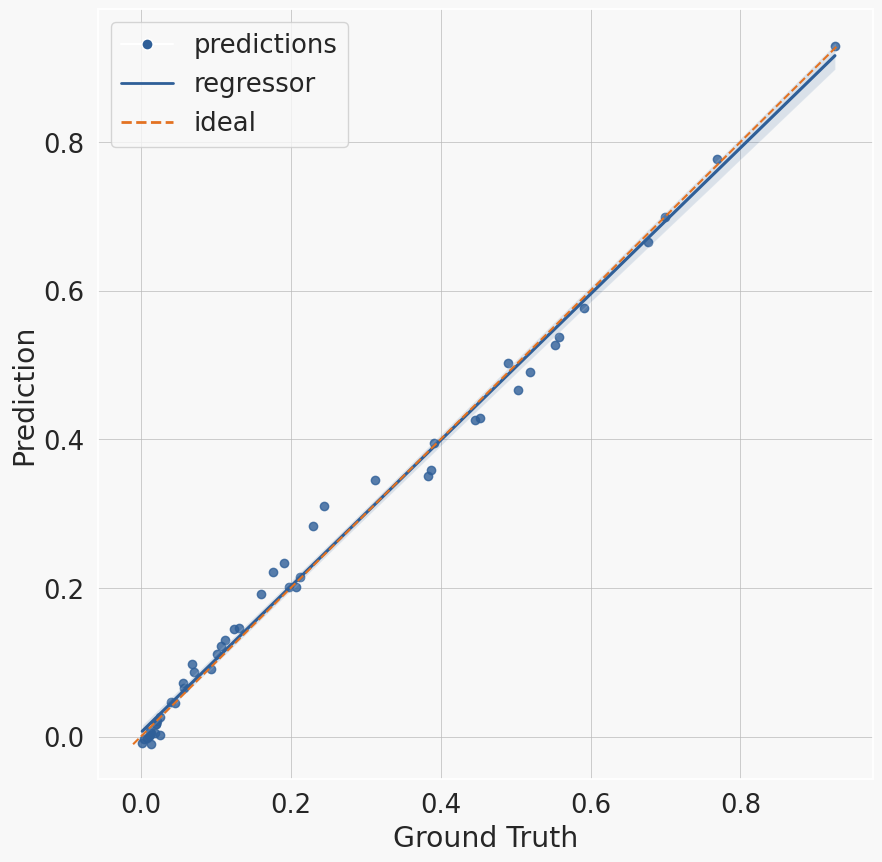

In [231]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)